In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from simplemc.DriverMC import DriverMC
from simplemc.plots import Simple_Plots
import corner
from getdist import plots, MCSamples
import getdist

# With MCMC

In [2]:
analysis1 = DriverMC(analyzername='mcmc', model='LCDM', datasets='HD+SN')

Loading  simplemc/data/HDiagramCompilacion-data_31.txt
Loading  simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Loading  simplemc/data/jla_binned_distances_31nodes_v1.txt
Loading  simplemc/data/cov_jla_binned_distances_31nodes_v1.txt
Eigenvalues of cov matrix: [0.0005070806003107887, 0.0005683516014088356, 0.000739250907386215] ... 0.03645982276128593
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05


In [ ]:
res1 = analysis1.executer(GRstop=0.01)

In [4]:
pars_labels = ['${}$'.format(p.Ltxname) for p in analysis1.pars_info]

In [5]:
samples1 = res1['result']['samples']
weights1 = res1['result']['weights']

In [6]:
om1 = res1['result']['samples'][:,0]
obh21 = res1['result']['samples'][:,1]
h1 = res1['result']['samples'][:,2]

## Nested Sampling

In [ ]:
analysis2 = DriverMC(analyzername='nested', model='LCDM', datasets='HD+SN')

In [ ]:
res2 = analysis2.executer(nlivepoints=100)

In [20]:
samples2 = res2['result']['samples']
weights2 = res2['result']['weights']
om2 = res2['result']['samples'][:,0]
obh22 = res2['result']['samples'][:,1]
h2 = res2['result']['samples'][:,2]

## EMCEE

In [ ]:
analysis3 = DriverMC(analyzername='emcee', model='LCDM', datasets='HD+SN')

In [23]:
res3 = analysis3.executer()

INFO:simplemc:
	walkers: 8
	nsamp: 10000
	burnin: 0
	nproc: 1
INFO:simplemc:Using 1 processor
100%|██████████| 10000/10000 [1:37:19<00:00,  1.71it/s]
INFO:simplemc:
Elapsed time: 97.335 minutes = 5840.112 seconds


Om: 0.3038 +/- 0.0299
Obh2: 0.0220 +/- 0.0005
h: 0.6909 +/- 0.0315


In [24]:
samples3 = res3['result']['samples']
weights3 = res3['result']['weights']

# Plots with getdist

In [26]:
# names = ["SN+BBAO", "SN+HD", "SN+HD+BBAO", "SN+HD+BBAO+Planck"]
labels =  ['{}'.format(p.Ltxname) for p in analysis1.pars_info]
labels, np.shape(samples1)

(['\\Omega_m', '\\Omega_{b}h^2', 'h'], (200, 3))

In [ ]:
samp1 = MCSamples(samples=samples1, names=labels, labels = labels, label='MCMC')
samp2 = MCSamples(samples=samples2, names = labels, labels = labels, label='Nested Sampling')
samp3 = MCSamples(samples=samples3, names = labels, labels = labels, label='EMCEE')

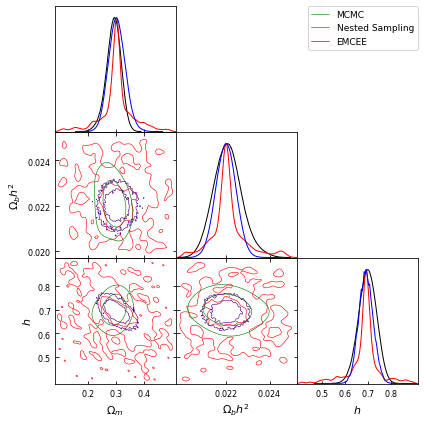

In [37]:
# Triangle plot
g = plots.get_subplot_plotter()
g.triangle_plot([samp1, samp2, samp3], filled=False, line_args={'lw':1},
                colors=['green', 'red', 'indigo'],
                settings={ 'smooth_scale_2D':0.8, 'smooth_scale_1D':0.6},)

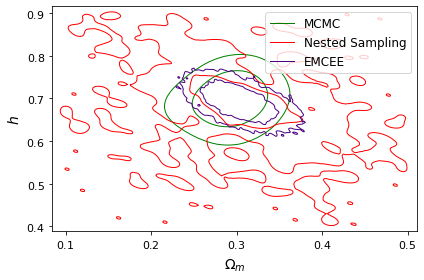

In [39]:
# Customized 2D filled comparison plot

g = plots.get_single_plotter(width_inch=6, ratio= 2. / 3.)
g.settings.legend_fontsize = 12
g.plot_2d([samp1, samp2, samp3], labels[0], labels[2], filled=False, line_args={'lw':1},
          colors=['green', 'red', 'indigo'], smooth_s=0.8)

g.add_legend(['MCMC', 'Nested Sampling', 'EMCEE'], legend_loc='upper right');